#Postavljamo runtime
Izabrat ćemo grafičku karticu koja nam odgovara


In [1]:
!nvidia-smi


Wed May 21 07:43:53 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   38C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

Pravimo home konstantu

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


Sada treba klonirati YOLOv9 repozitorij i instalirati sve neophodne requirements-e



In [3]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (190/190), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 325 (delta 145), reused 142 (delta 142), pack-reused 135 (from 1)
Receiving objects: 100% (325/325), 2.23 MiB | 24.60 MiB/s, done.
Resolving deltas: 100% (165/165), done.
/content/yolov9
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:0

Treba dodati i Roboflow jer nam se dataset nalazi na njemu.

In [4]:
!pip install -q roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 119.9 MB/s eta 0:00:00


#Treba download-ovati wights za yolo model

In [5]:
!mkdir -p {HOME}/weights

In [6]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [7]:
!ls -la {HOME}/weights

total 402452
drwxr-xr-x 2 root root      4096 May 21 07:46 .
drwxr-xr-x 1 root root      4096 May 21 07:46 ..
-rw-r--r-- 1 root root  51508261 Feb 18  2024 gelan-c.pt
-rw-r--r-- 1 root root 117203713 Feb 18  2024 gelan-e.pt
-rw-r--r-- 1 root root 103153312 Feb 18  2024 yolov9-c.pt
-rw-r--r-- 1 root root 140217688 Feb 18  2024 yolov9-e.pt


#Sada treba učitati Dataset koji je kreiran na Roboflow stranici

In [8]:
%cd {HOME}/yolov9

from roboflow import Roboflow
rf = Roboflow(api_key="MCsBZodB7aDszOIuUcrW")
project = rf.workspace("proba-kl4li").project("futsal-analiza")
version = project.version(3)
dataset = version.download("yolov9")

/content/yolov9
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Futsal-analiza-3 in yolov9:: 100%|██████████| 1958/1958 [00:00<00:00, 5372.27it/s]


#Informacije o datasetu

In [9]:
import yaml


yaml_path = "/content/yolov9/Futsal-analiza-3/data.yaml"

with open(yaml_path, 'r') as f:
    data_yaml = yaml.safe_load(f)

print("Classes:", data_yaml['names'])

Classes: ['ball', 'goalkeeper', 'player', 'referee']


In [10]:
import os

def count_images(folder):
    images_path = os.path.join(dataset.location, folder, "images")
    return len([f for f in os.listdir(images_path) if f.endswith((".jpg", ".png", ".jpeg"))])

print("Training images:", count_images("train"))
print("Validation images:", count_images("valid"))
print("Test images:", count_images("test"))


Training images: 728
Validation images: 145
Test images: 100


In [12]:
#provjera da li je GPU aktivan
import torch
print(torch.cuda.is_available())

True


#Treniranje nad Futsal-analiza-3 datasetom

In [15]:
%cd {HOME}/yolov9

!python train.py \
--batch 8 \
--epochs 100 \
--patience 20 \
--img 640 \
--device 0 \
--min-items 0 \
--close-mosaic 15 \
--data {dataset.location}/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml \
--project runs/train \
--name futsal_gelan

/content/yolov9
2025-05-21 07:54:45.713394: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747814085.735109    4162 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747814085.741224    4162 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-21 07:54:45.761610: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
wandb: Currently logged in as: aljaljak2 (aljaljak2-faculty-of-electrical-engineering) to https://api

#Pregled rezultata treninga

In [17]:
!ls {HOME}/yolov9/runs/train/futsal_gelan3/

events.out.tfevents.1747814089.92b1feed5a56.4162.0  labels.jpg	 weights
hyp.yaml					    opt.yaml
labels_correlogram.jpg				    results.csv


In [22]:
import pandas as pd
results = pd.read_csv('/content/yolov9/runs/train/futsal_gelan3/results.csv')
print("Kolone u CSV:")
print(results.columns.tolist())

Kolone u CSV:
['               epoch', '      train/box_loss', '      train/cls_loss', '      train/dfl_loss', '   metrics/precision', '      metrics/recall', '     metrics/mAP_0.5', 'metrics/mAP_0.5:0.95', '        val/box_loss', '        val/cls_loss', '        val/dfl_loss', '               x/lr0', '               x/lr1', '               x/lr2']


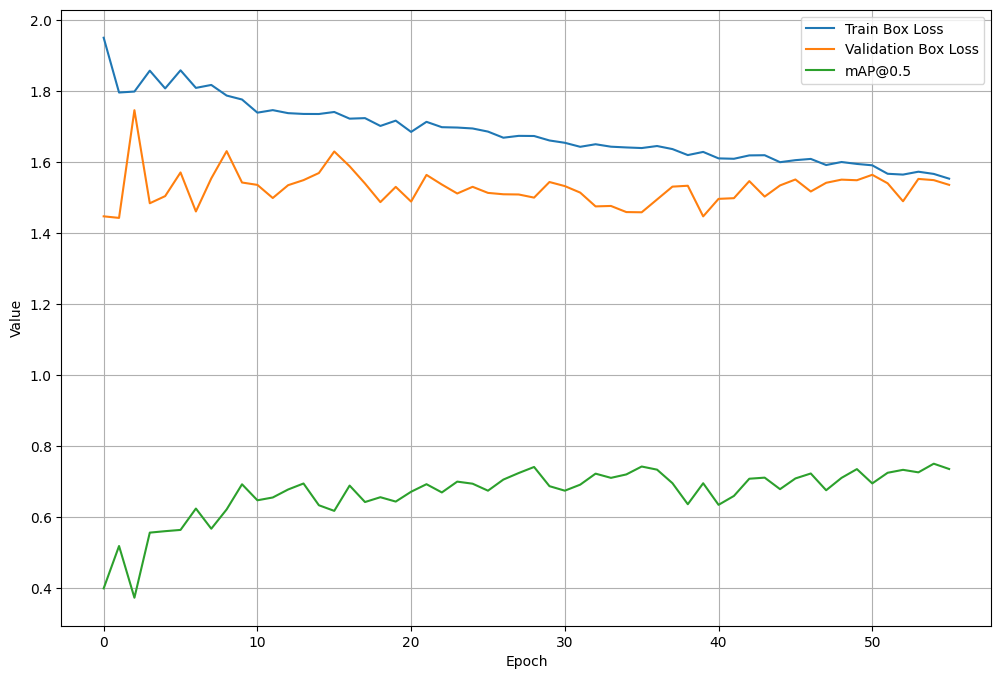

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

results = pd.read_csv('/content/yolov9/runs/train/futsal_gelan3/results.csv')

# Clean column names by stripping whitespace and standardizing
results.columns = results.columns.str.strip().str.lower().str.replace(' ', '_')

plt.figure(figsize=(12, 8))

# Try multiple possible column name variations
train_loss_col = next((col for col in results.columns
                      if 'train' in col and 'box' in col and 'loss' in col), None)
val_loss_col = next((col for col in results.columns
                   if ('val' in col or 'valid' in col) and 'box' in col and 'loss' in col), None)
map_col = next((col for col in results.columns
               if 'map' in col and ('0.5' in col or '50' in col)), None)

if train_loss_col:
    plt.plot(results[train_loss_col], label='Train Box Loss')
if val_loss_col:
    plt.plot(results[val_loss_col], label='Validation Box Loss')
if map_col:
    plt.plot(results[map_col], label='mAP@0.5')

plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.savefig('/content/yolov9/runs/train/futsal_gelan3/results.png')
plt.show()

#Validacija na validacijskom skupu

In [28]:
%cd {HOME}/yolov9


!python val.py \
  --img 640 \
  --batch 16 \
  --conf 0.01 \
  --iou 0.6 \
  --device 0 \
  --task test \
  --name my_validation_run \
  --data {dataset.location}/data.yaml \
  --weights {HOME}/yolov9/runs/train/futsal_gelan3/weights/best.pt \
  --save-json \
  --save-conf \
  --save-txt

/content/yolov9
val: data=/content/yolov9/Futsal-analiza-3/data.yaml, weights=['/content/yolov9/runs/train/futsal_gelan3/weights/best.pt'], batch_size=16, imgsz=640, conf_thres=0.01, iou_thres=0.6, max_det=300, task=test, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=True, save_hybrid=False, save_conf=True, save_json=True, project=runs/val, name=my_validation_run, exist_ok=False, half=False, dnn=False, min_items=0
WARNING ⚠️ confidence threshold 0.01 > 0.001 produces invalid results
YOLOv5 🚀 1e33dbb Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25414044 parameters, 0 gradients, 102.5 GFLOPs
test: Scanning /content/yolov9/Futsal-analiza-3/test/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100% 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 7/7 [00:06<00:00,  1.16it/s]
                   all        100       1014  

In [30]:
!python detect.py \
--img 640 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/futsal_gelan3/weights/best.pt \
--source {dataset.location}/valid/images

detect: weights=['/content/yolov9/runs/train/futsal_gelan3/weights/best.pt'], source=/content/yolov9/Futsal-analiza-3/valid/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25414044 parameters, 0 gradients, 102.5 GFLOPs
image 1/145 /content/yolov9/Futsal-analiza-3/valid/images/frame_0798_jpg.rf.465e8daa88ae10afd757b35fcdc79de1.jpg: 640x640 1 ball, 5 players, 50.9ms
image 2/145 /content/yolov9/Futsal-analiza-3/valid/images/frame_0799_jpg.rf.f5632e1e7e608094efa8ec8b051d0631.jpg: 640x640 4 players, 1 referee, 41.8ms
i

#Prikaz rezultata na slikama

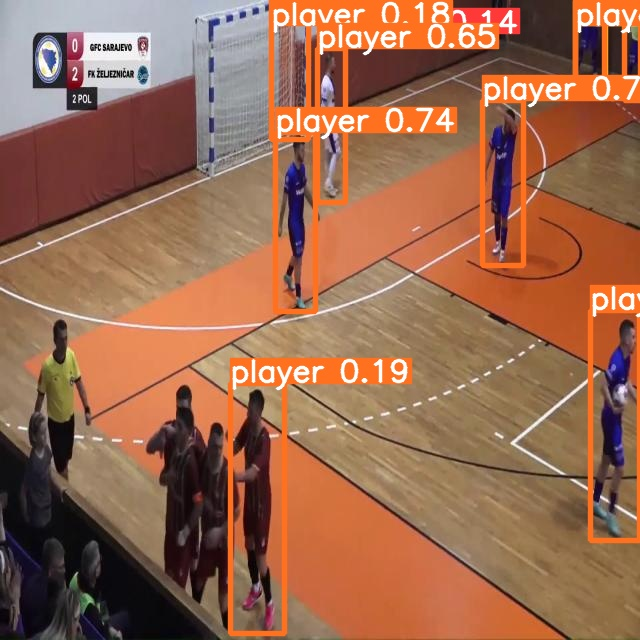

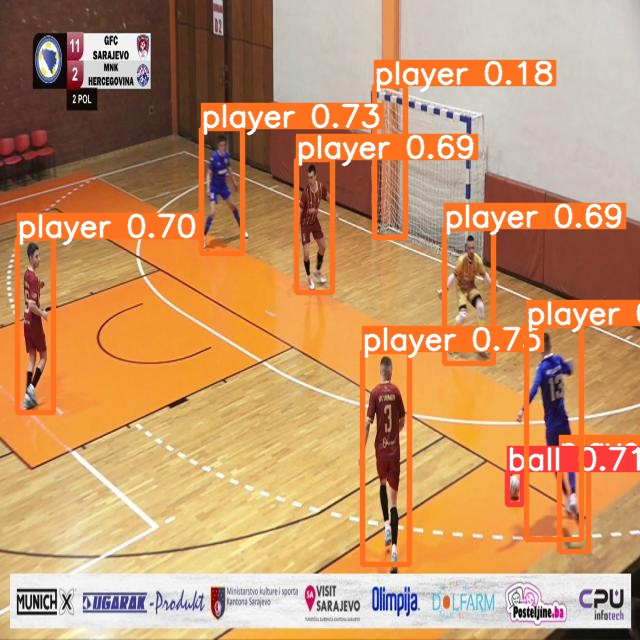

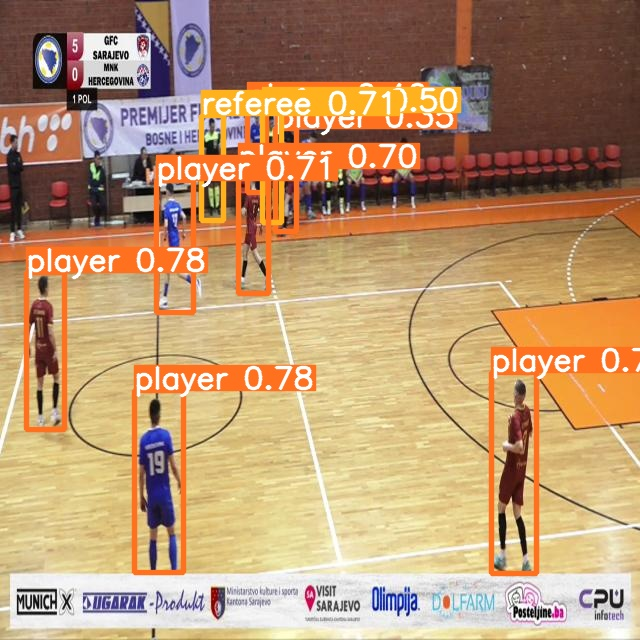

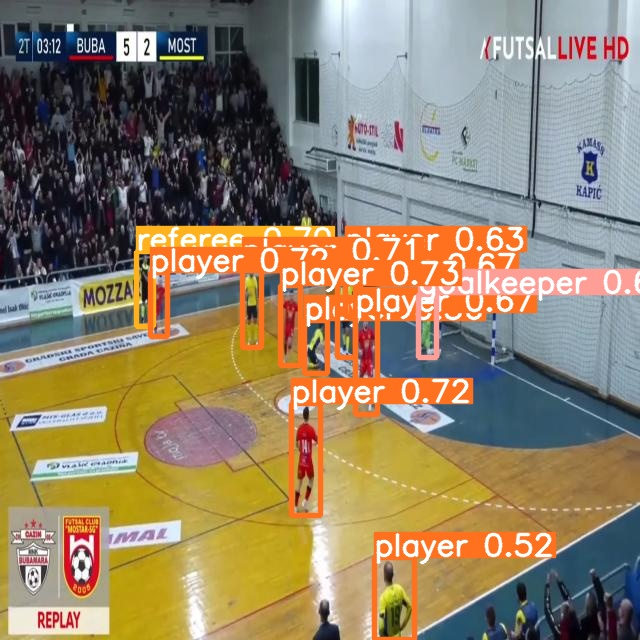

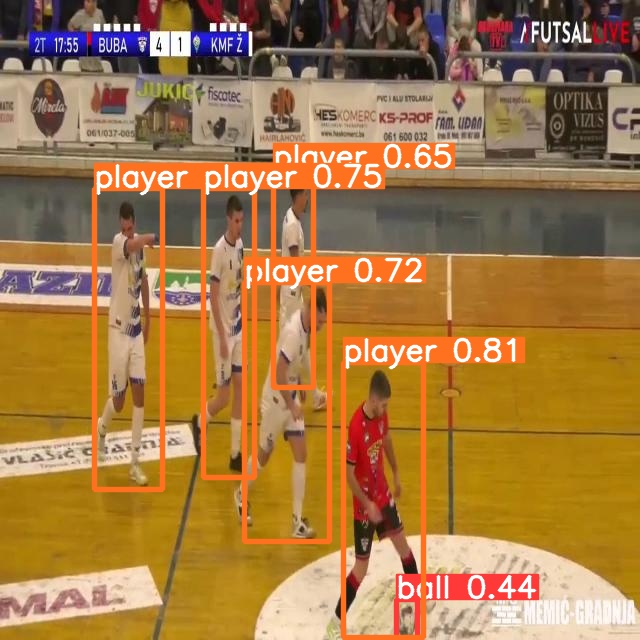

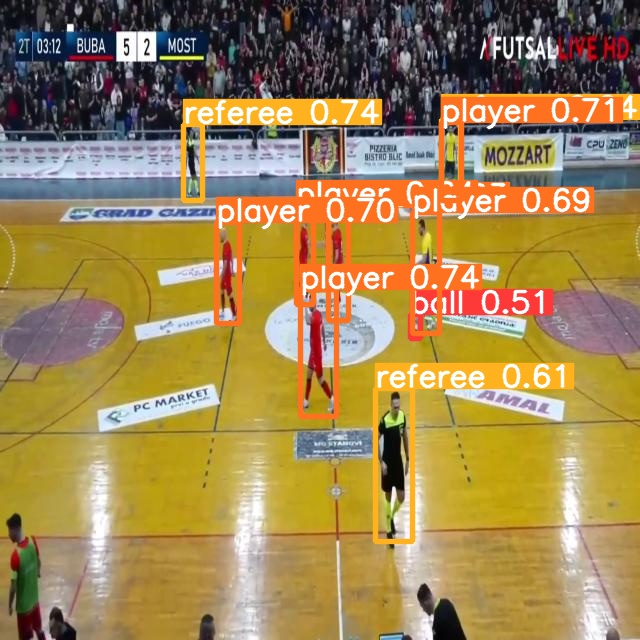

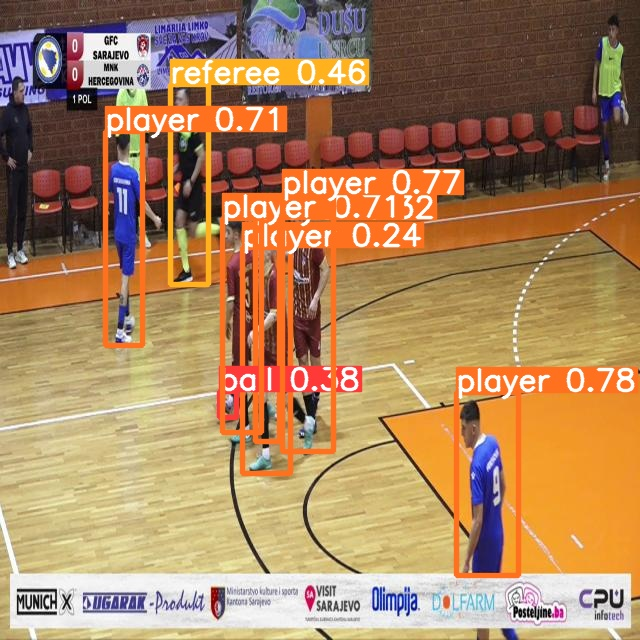

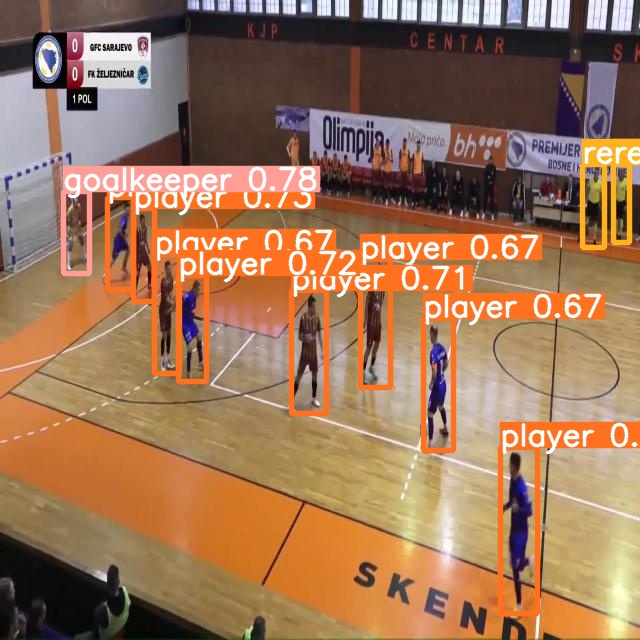

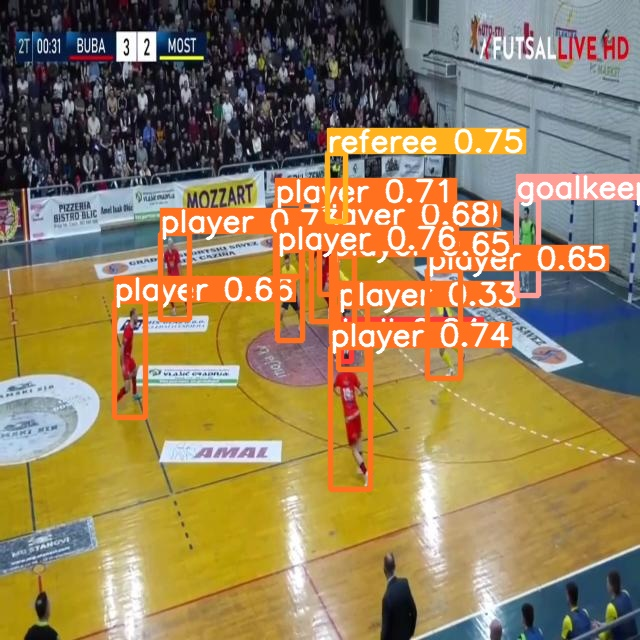

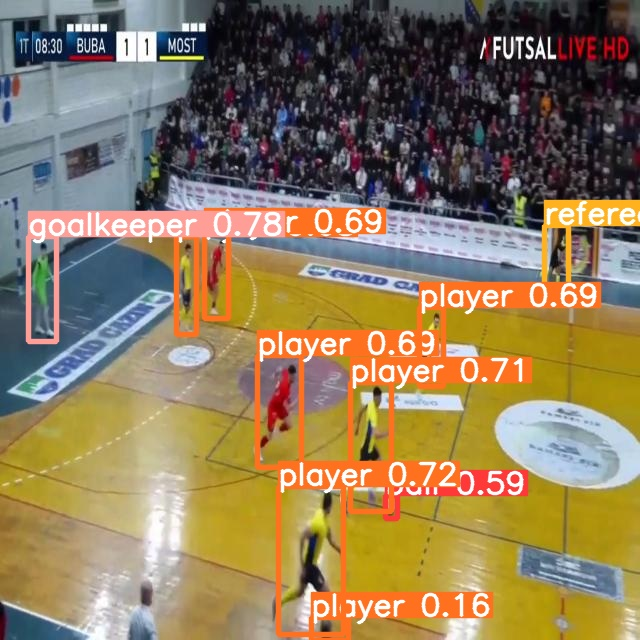

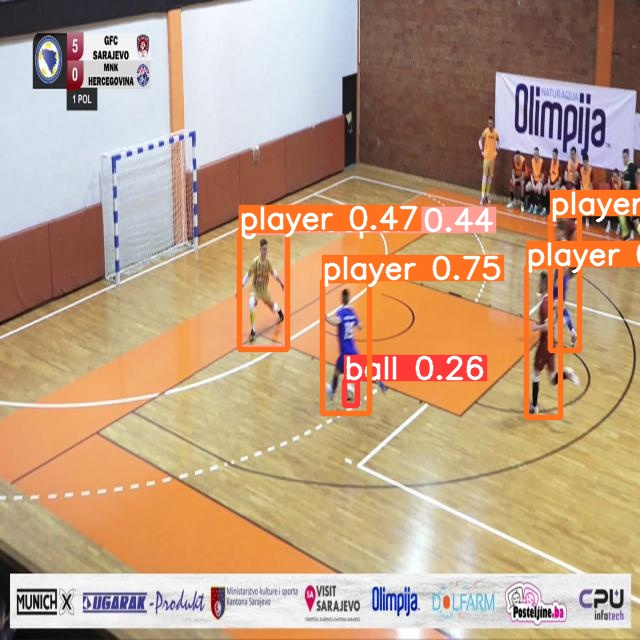

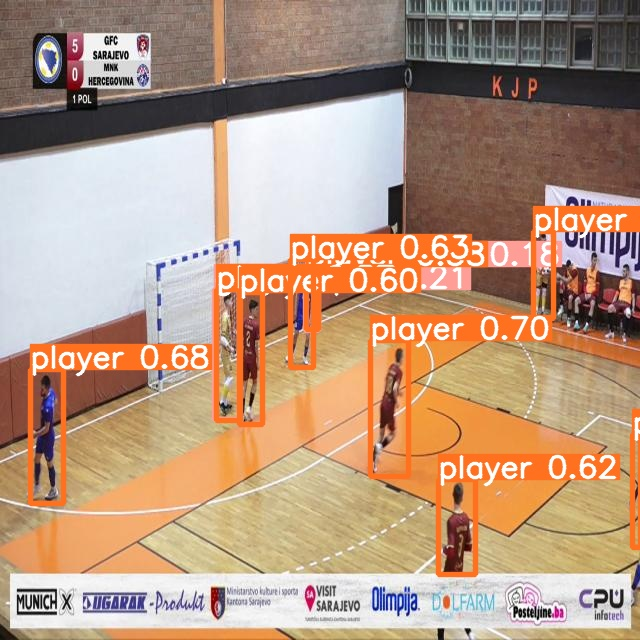

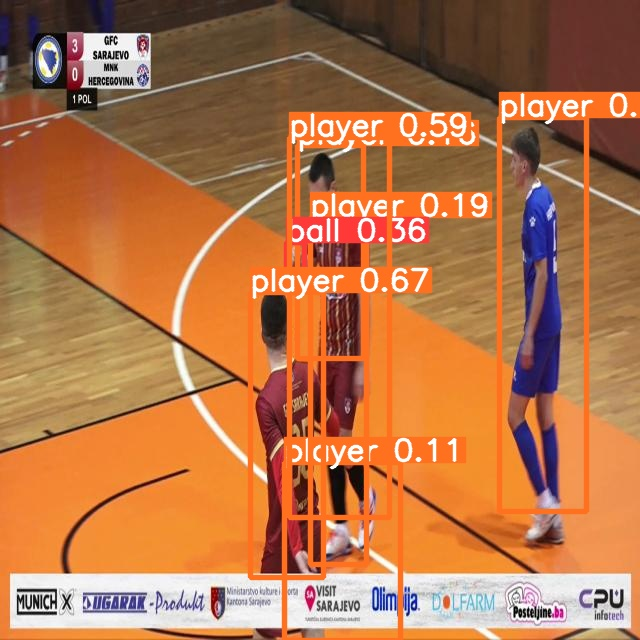

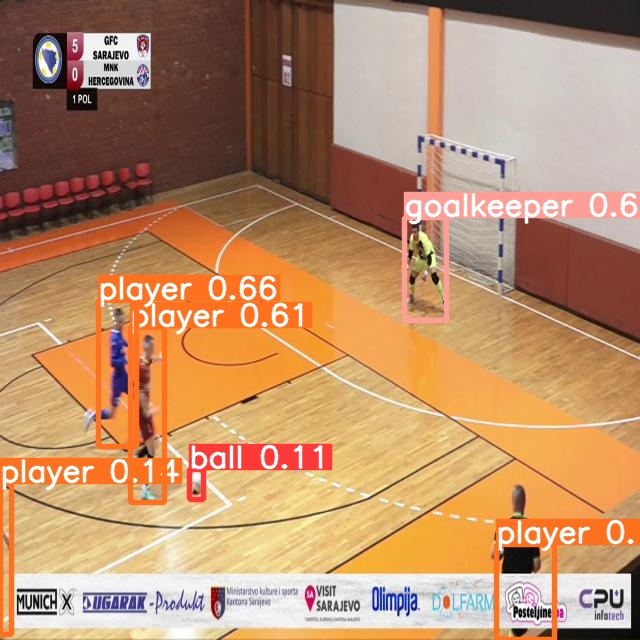

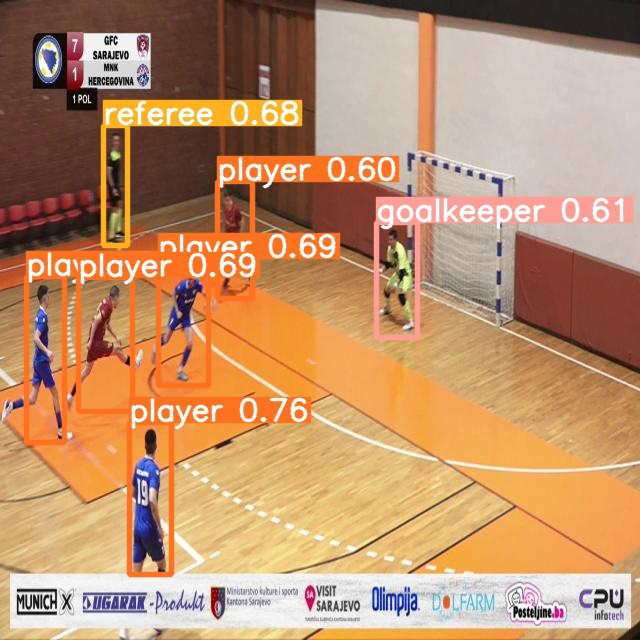

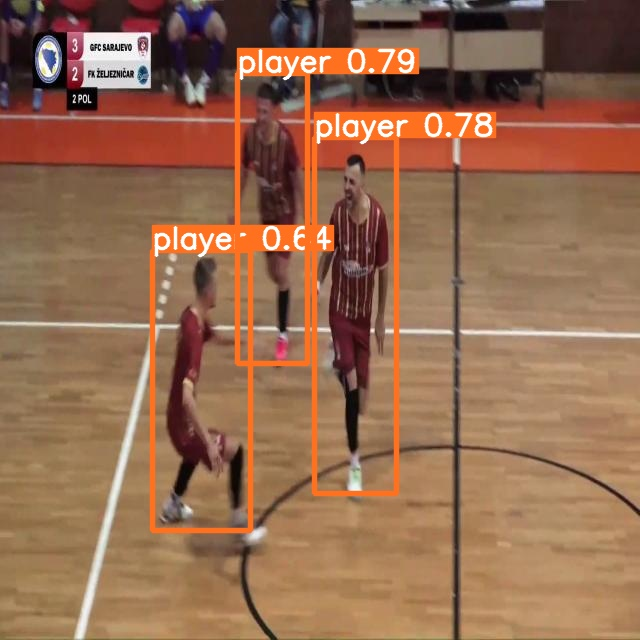

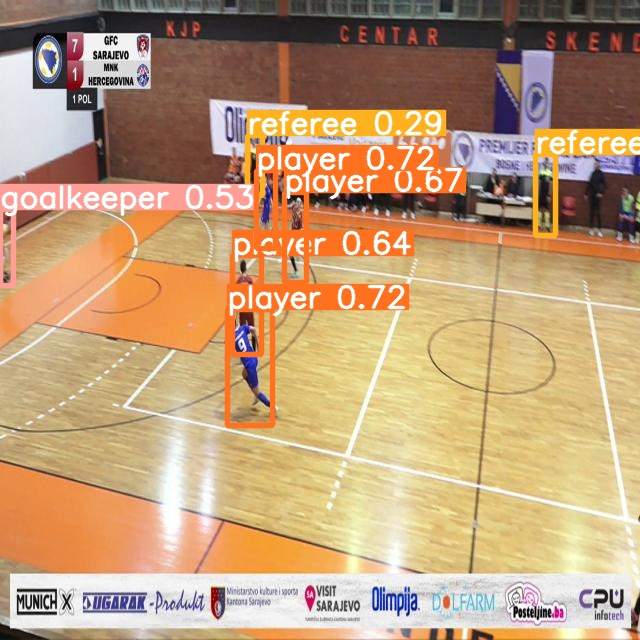

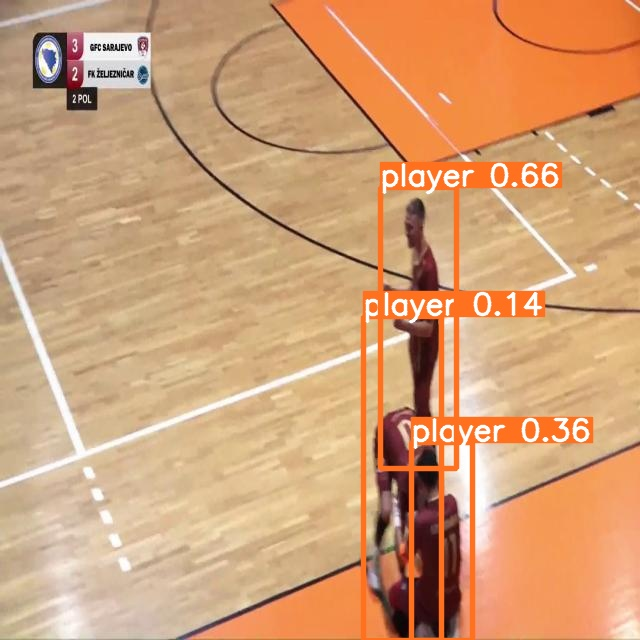

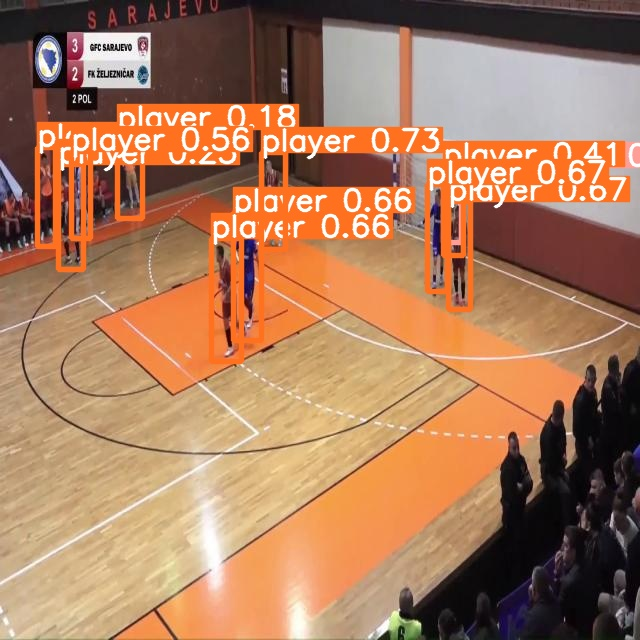

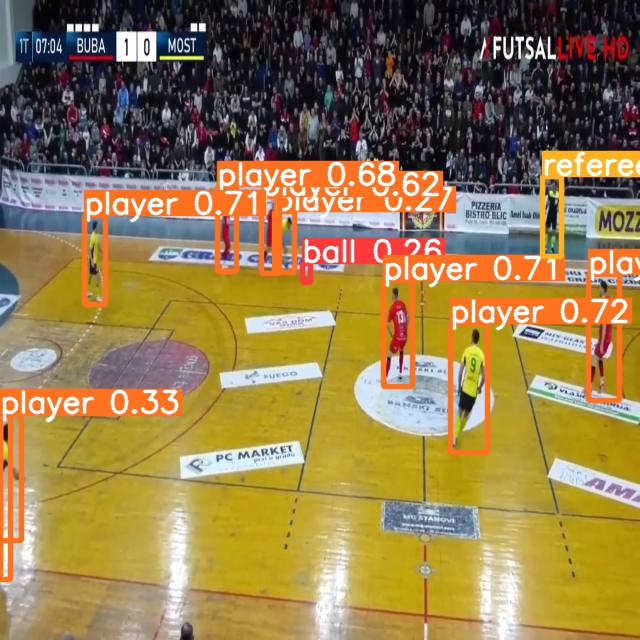

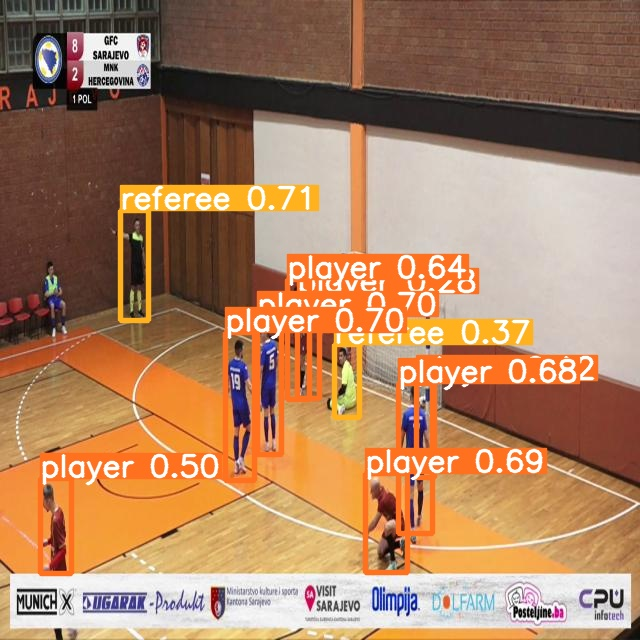

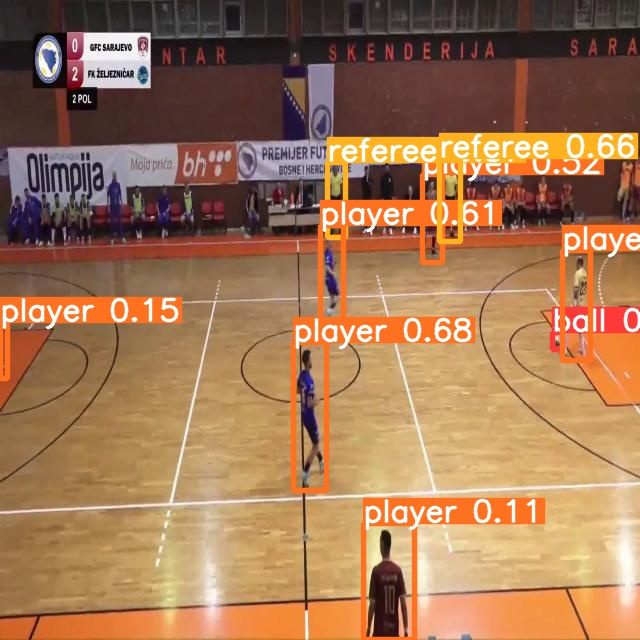

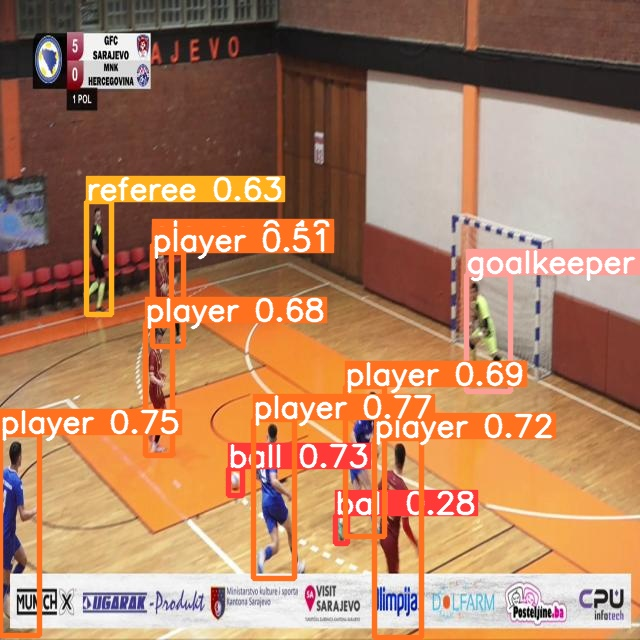

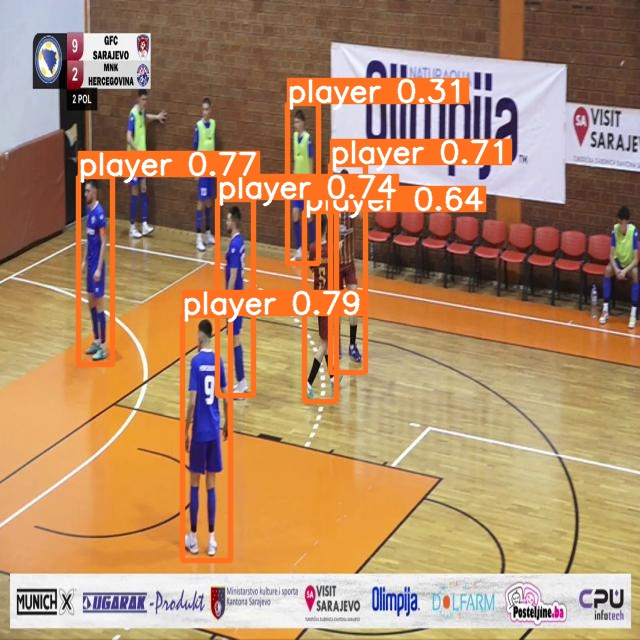

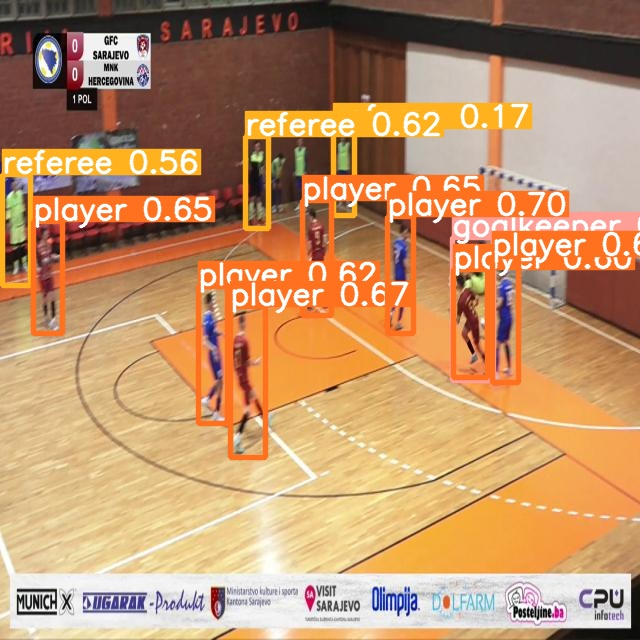

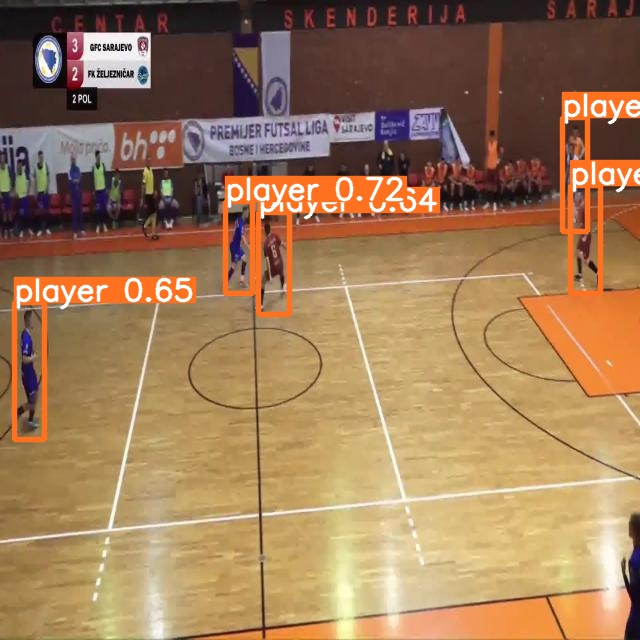

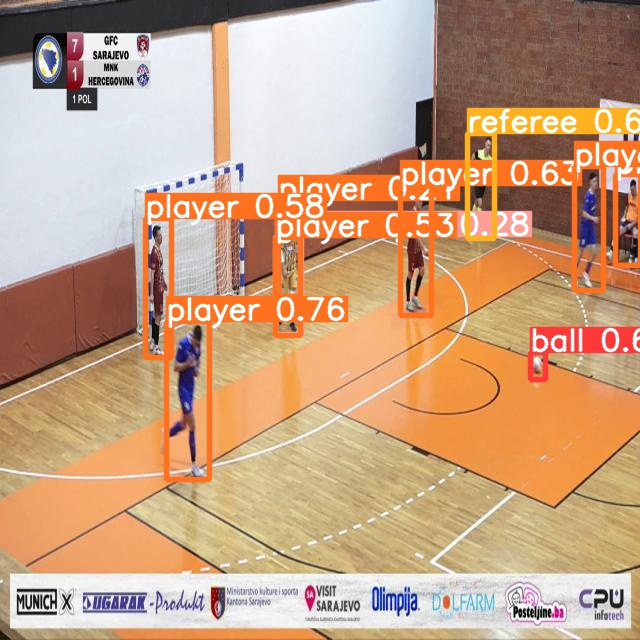

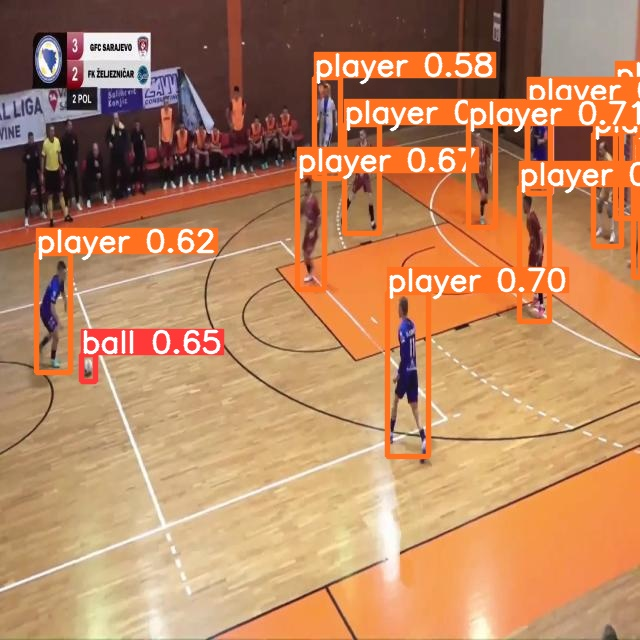

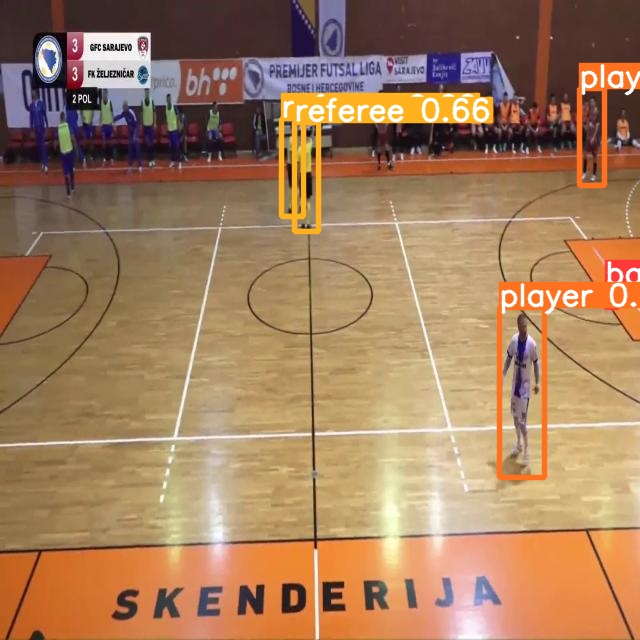

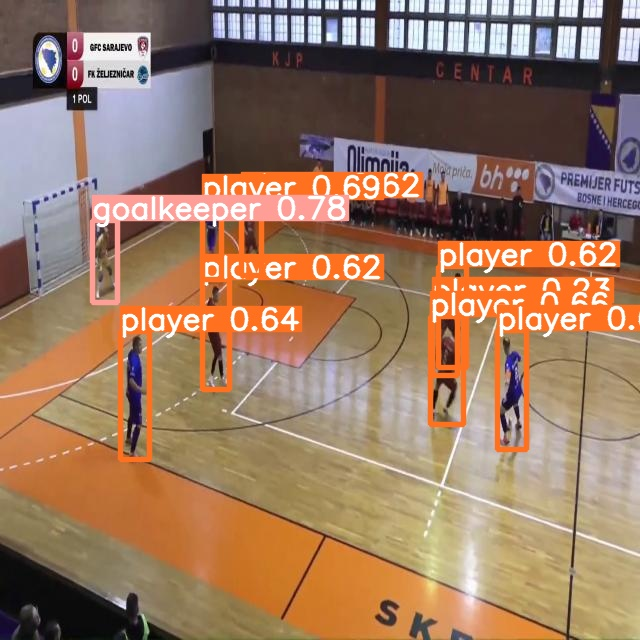

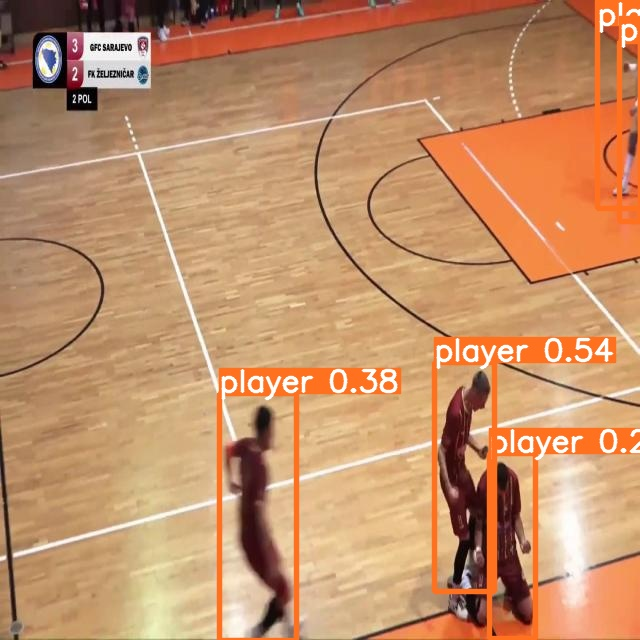

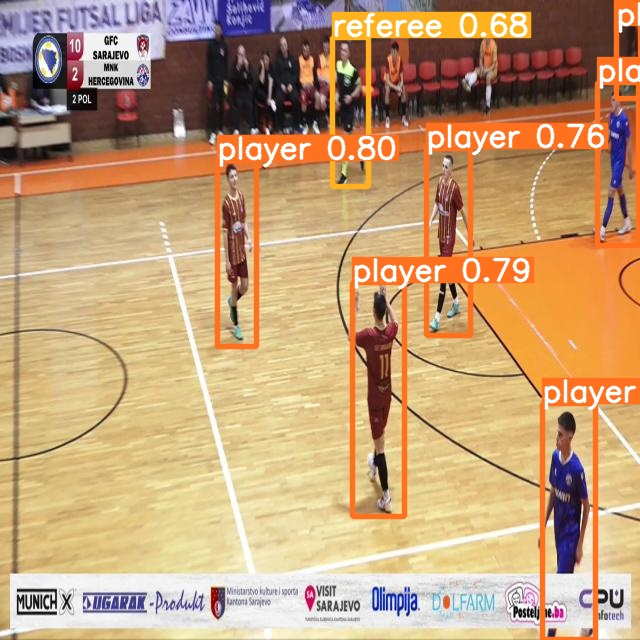

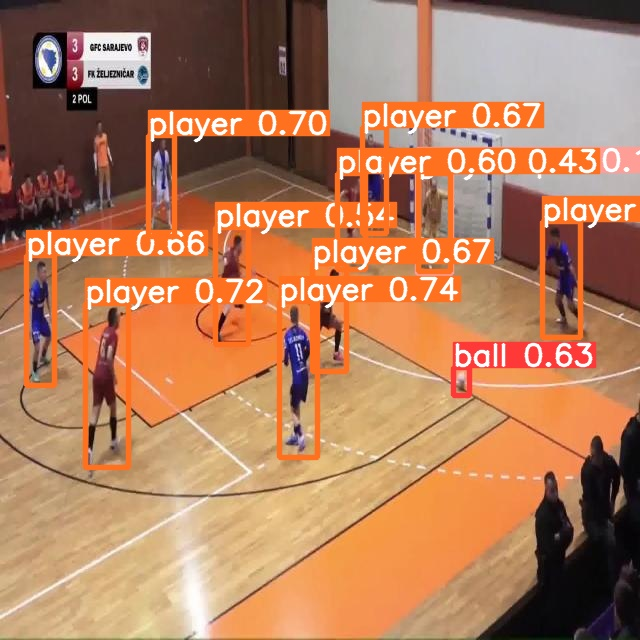

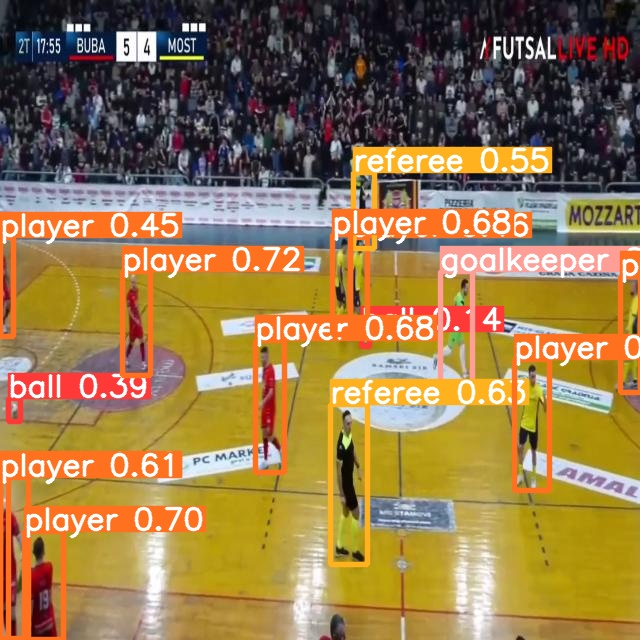

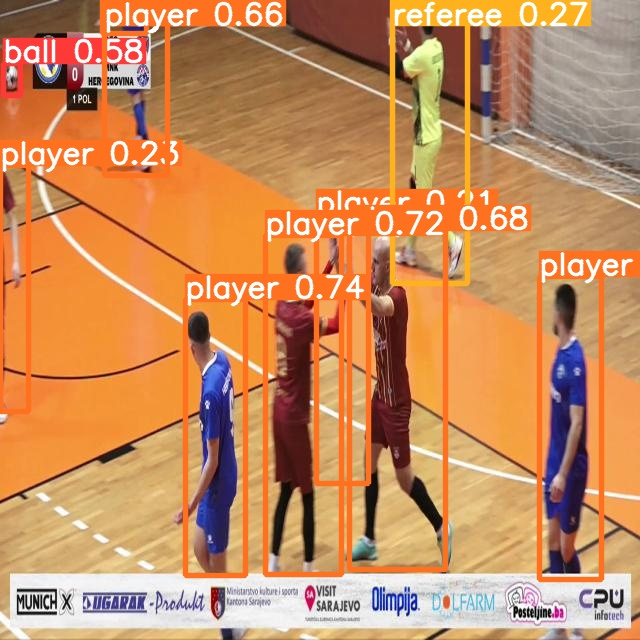

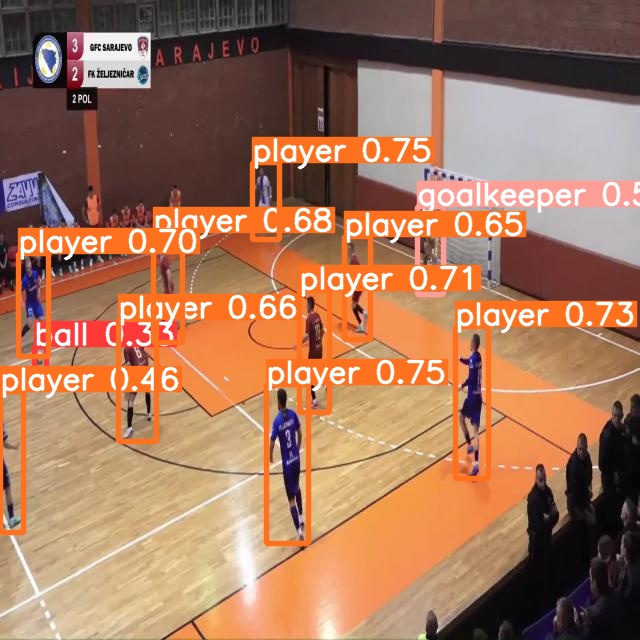

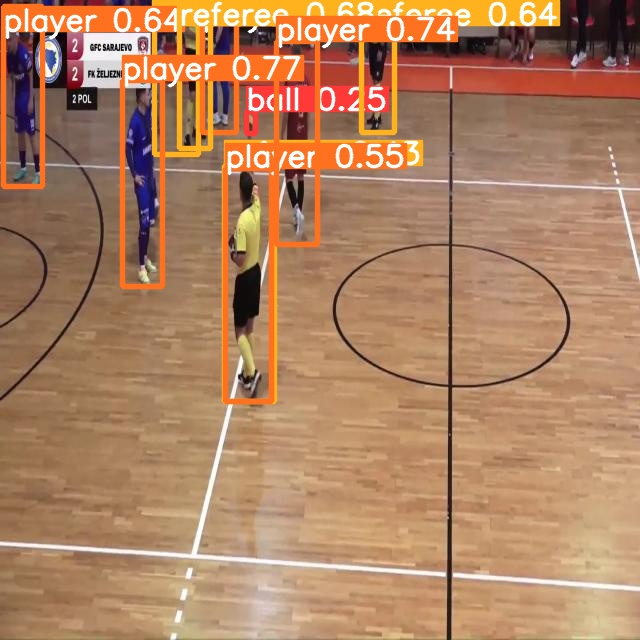

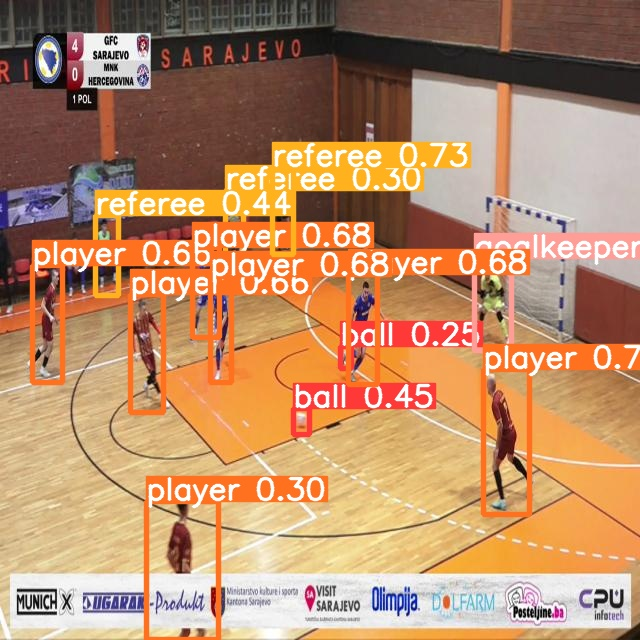

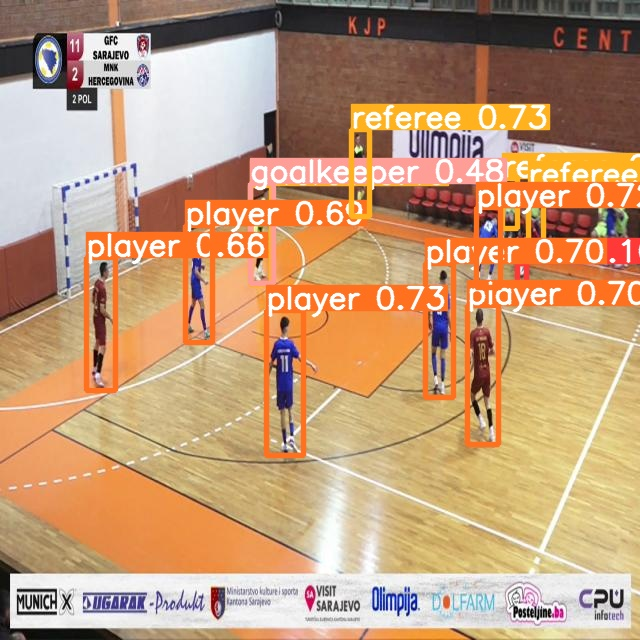

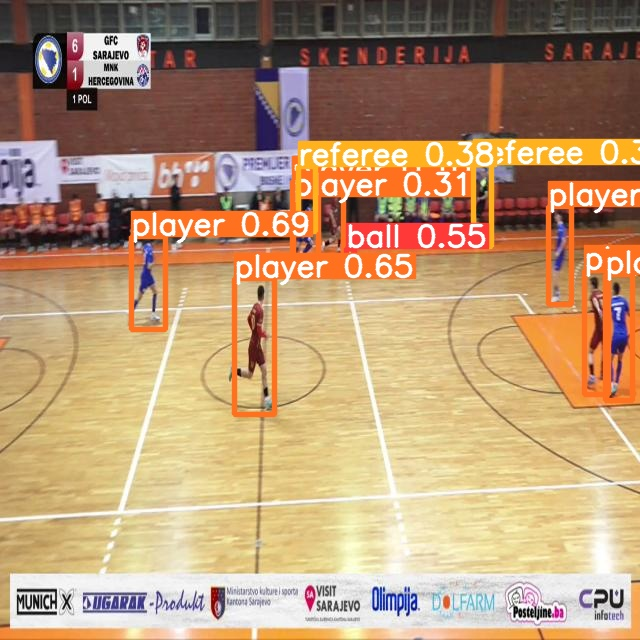

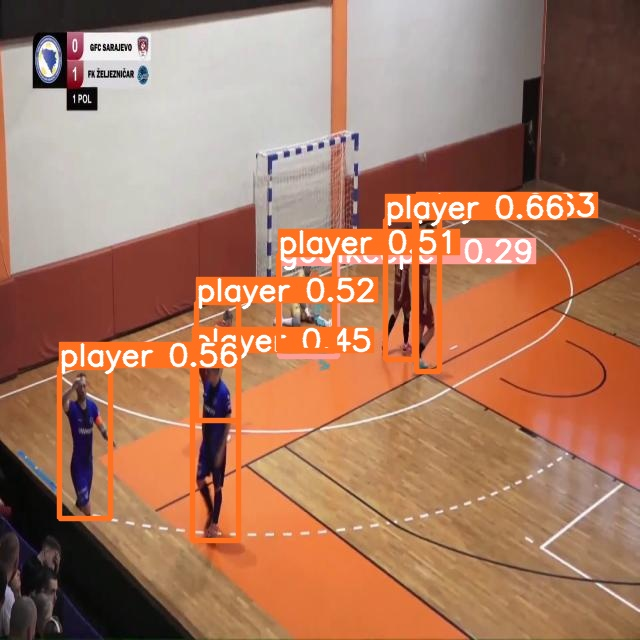

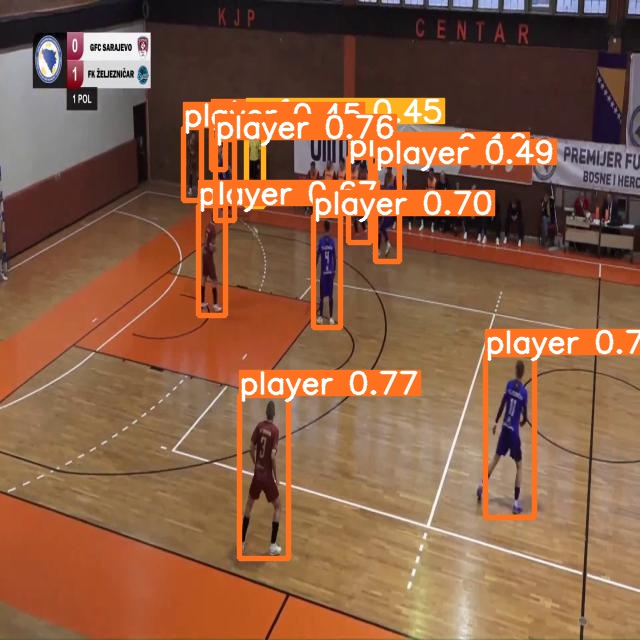

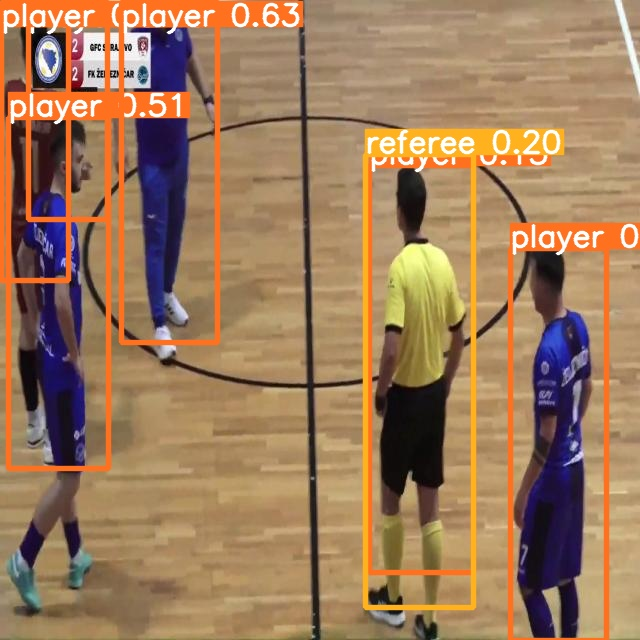

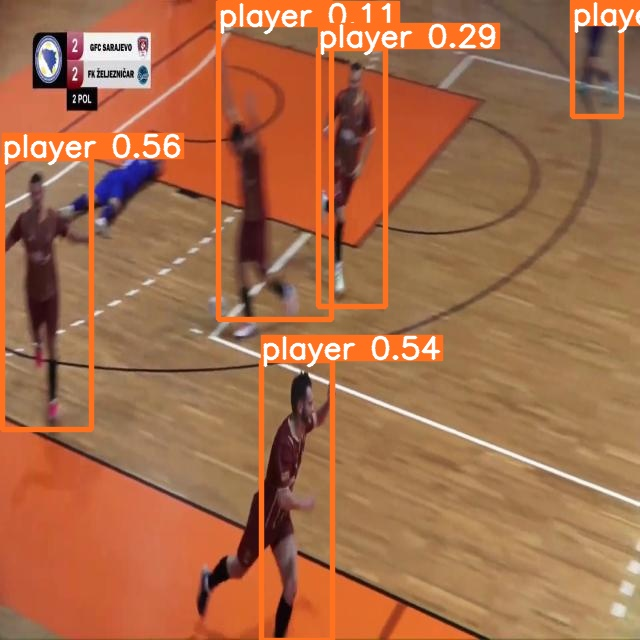

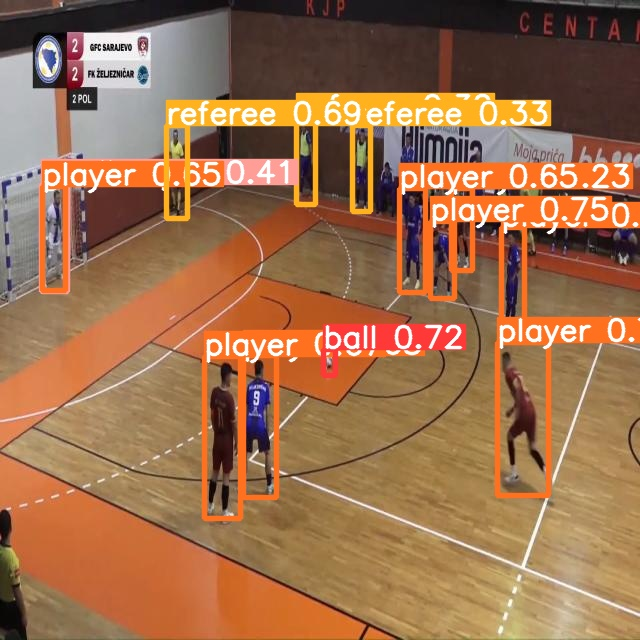

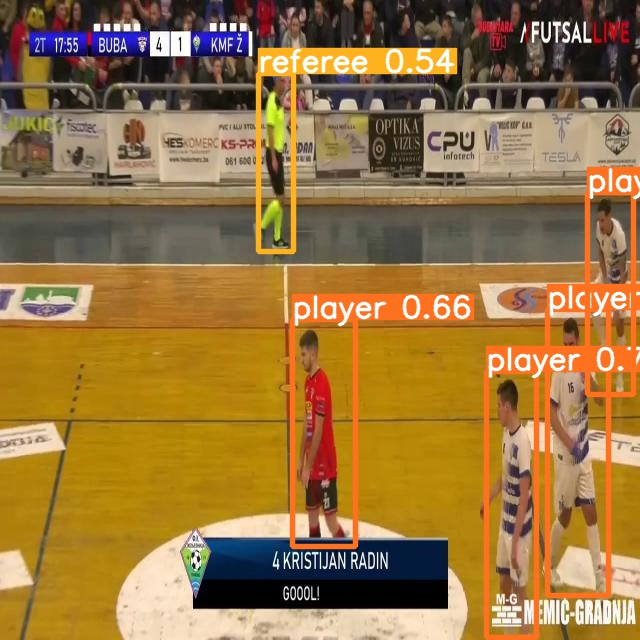

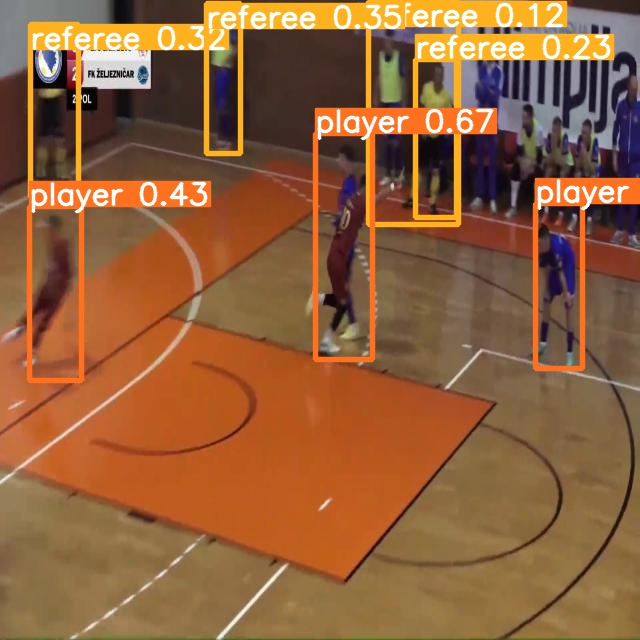

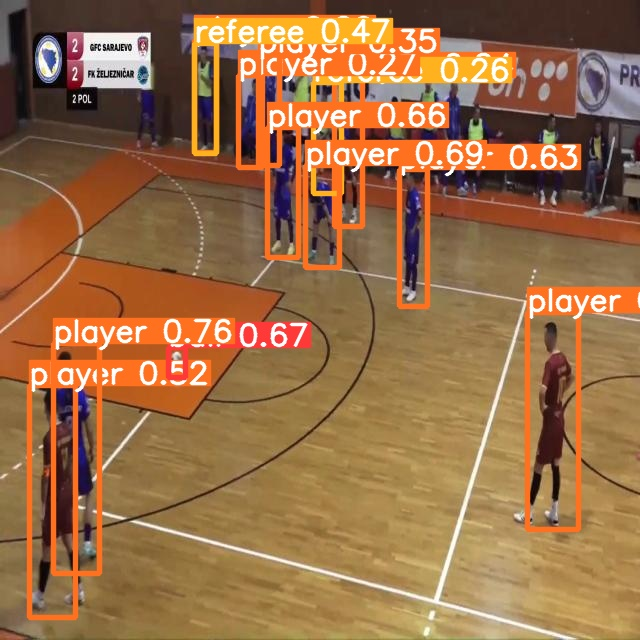

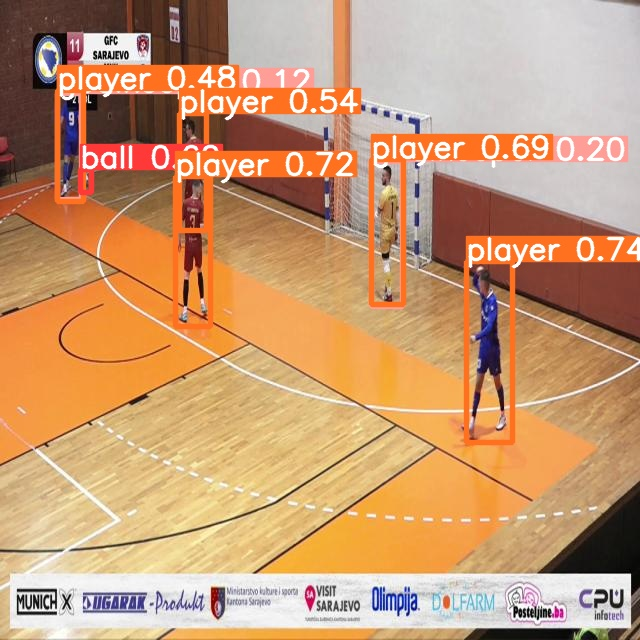

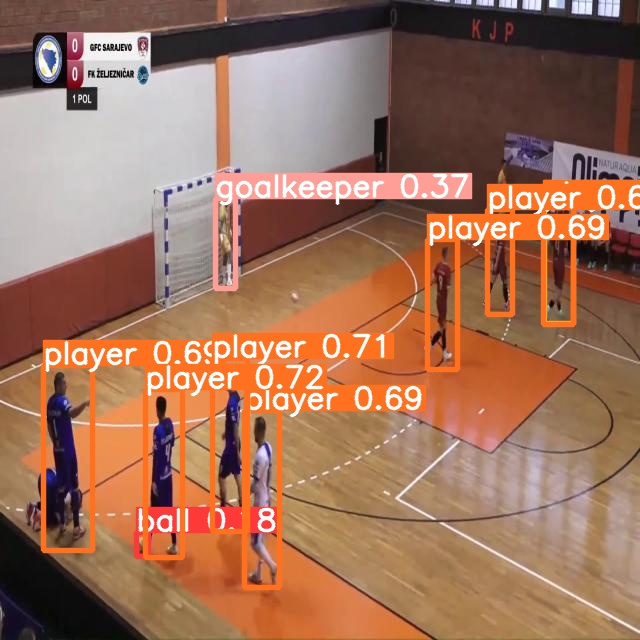

In [36]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp2/*.jpg')[:50]:
      display(Image(filename=image_path, width=600))
      print("\n")